# PCA on Normalized and Raw data, Tissue and Project labeling

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
normalized_exp=pd.read_csv(r"expression_data/Leaf_Root_normalized_data.csv",index_col='Unnamed: 0').T
raw_exp= pd.read_csv(r"expression_data/Leaf_Root_raw_data.csv",index_col='Unnamed: 0').T
annot= pd.read_csv(r"expression_data/Leaf_Root_annotation.csv")
normalized_exp.loc[:,'true_cluster']=np.array(annot.loc[annot['Sample']==normalized_exp.index,'Tissue'])
raw_exp.loc[:,'true_cluster']=np.array(annot.loc[annot['Sample']==raw_exp.index,'Tissue'])
normalized_exp['true_cluster']=normalized_exp['true_cluster'].apply(lambda x:0 if x=="Root" else 1)
raw_exp['true_cluster']=normalized_exp['true_cluster'].apply(lambda x:0 if x=="Root" else 1)

In [33]:
normalized_exp.head()

,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.1,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.2,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.3,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.4,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.5,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.6,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.7,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.8,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.9,rna-gnl|WGS:JAHRHJ|evm2.model.Chr01.10,...,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_994.2,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_995.1,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_996.1,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_998.1,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_999.5,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_999.4,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_999.1,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_999.2,rna-gnl|WGS:JAHRHJ|evm2.model.unplaceContig_999.3,true_cluster
SRR10913924,-0.271727,1.500167,-0.271727,-0.271727,-0.228930,0.159775,0.439050,-0.271727,-0.271727,-0.271727,...,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.229063,-0.244201,1.190680,-0.190218,1
SRR10913925,-0.271727,1.267299,-0.271727,-0.271727,-0.154987,-0.073867,0.572949,-0.271727,-0.271727,-0.271727,...,-0.271727,-0.224829,-0.271727,-0.271727,-0.271727,-0.271727,-0.064470,1.290688,-0.182506,1
SRR10913926,-0.271727,1.405773,-0.271727,-0.271727,-0.154141,0.156345,0.363721,-0.271727,-0.271727,-0.271727,...,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.244201,1.152494,-0.271727,1
SRR10913927,-0.271727,1.369847,-0.271727,-0.271727,-0.027255,-0.028505,0.363721,-0.271727,-0.271727,-0.271727,...,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.244201,1.162518,-0.210936,1
SRR10913928,-0.271727,1.607823,-0.271727,-0.271727,0.005991,0.150222,0.377672,-0.271727,-0.271727,-0.271727,...,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.271727,-0.184910,1.588581,-0.271727,0


# Normalized Data

## Normalized: Tissue Label

[Text(50.722222222222214, 0.5, 'True Clusters'),
 Text(0.5, 23.52222222222222, 'Predicted')]

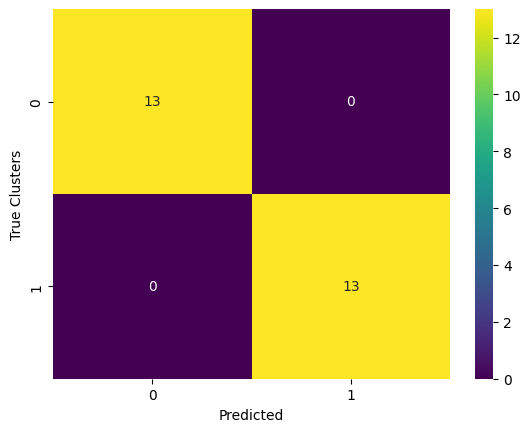

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
tissue_label= pd.factorize(annot['Tissue'])[0]
project_label=pd.factorize(annot['Project'])[0]
k=2
kmeans=KMeans(n_clusters=k,n_init='auto')
kmeans.fit(normalized_exp.iloc[:,0:44770])
#column=f"kmeans_cluster_k{k}"
#normalized_exp[column]=kmeans.labels_
predicted=kmeans.labels_
confusion_mat=confusion_matrix(tissue_label, kmeans.labels_)
   
hp=sns.heatmap(confusion_mat,annot=True,cmap="viridis") 
hp.set(ylabel='True Clusters',xlabel='Predicted')

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
transformed_data=pca.fit_transform(normalized_exp.iloc[:,0:44770])



<Axes: >

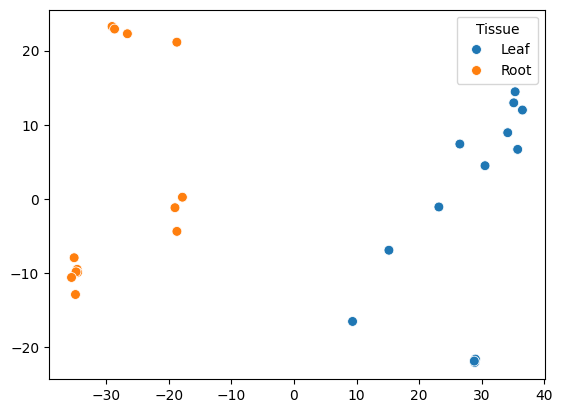

In [36]:
sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],s=50,hue=annot['Tissue'])


## Normalized: Project Label

[Text(50.722222222222214, 0.5, 'True Clusters'),
 Text(0.5, 23.52222222222222, 'Predicted')]

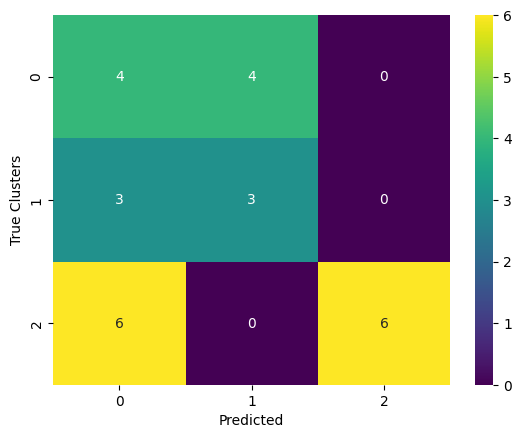

In [37]:

k=3
kmeans=KMeans(n_clusters=k,n_init='auto')
kmeans.fit(normalized_exp.iloc[:,0:44770])
#column=f"kmeans_cluster_k{k}"
predicted=kmeans.labels_
confusion_mat=confusion_matrix(project_label, predicted)
hp=sns.heatmap(confusion_mat,annot=True,cmap="viridis") 
hp.set(ylabel='True Clusters',xlabel='Predicted')    



<Axes: >

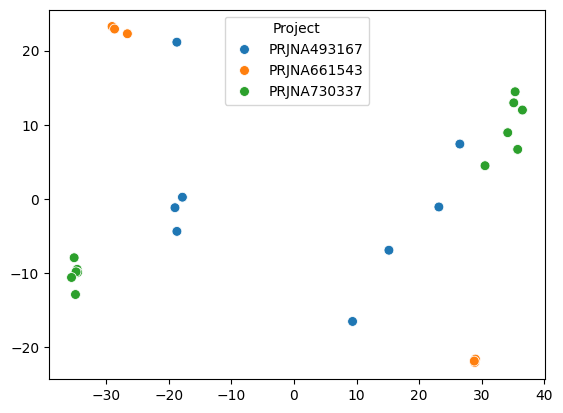

In [38]:
sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],s=50,hue=annot['Project'])


# Raw Data

## Raw: Tissue Label

[Text(50.722222222222214, 0.5, 'True Clusters'),
 Text(0.5, 23.52222222222222, 'Predicted')]

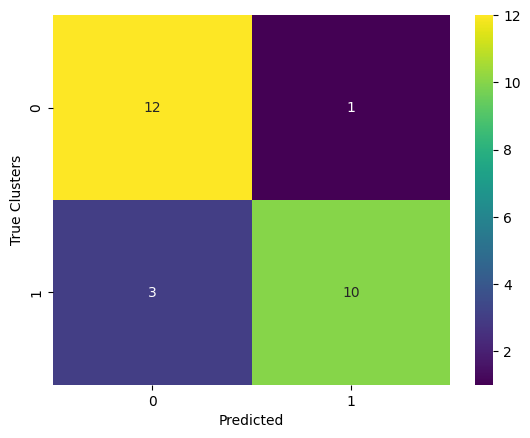

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
tissue_label= pd.factorize(annot['Tissue'])[0]
project_label=pd.factorize(annot['Project'])[0]
k=2
kmeans=KMeans(n_clusters=k,n_init='auto')
kmeans.fit(raw_exp.iloc[:,0:44770])
#column=f"kmeans_cluster_k{k}"
#normalized_exp[column]=kmeans.labels_
predicted=kmeans.labels_
confusion_mat=confusion_matrix(tissue_label, kmeans.labels_)
   
hp=sns.heatmap(confusion_mat,annot=True,cmap="viridis") 
hp.set(ylabel='True Clusters',xlabel='Predicted')    


<Axes: >

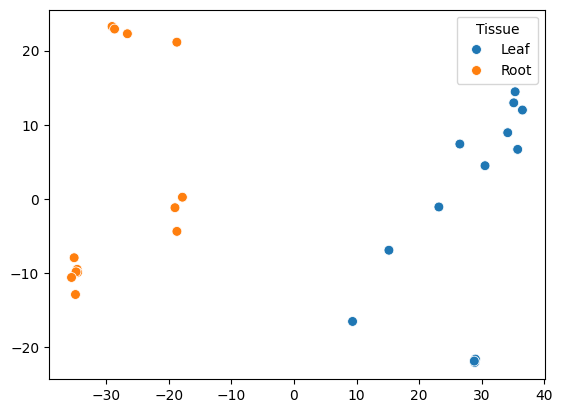

In [41]:
sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],s=50,hue=annot['Tissue'])


## Raw: Project Label

<Axes: >

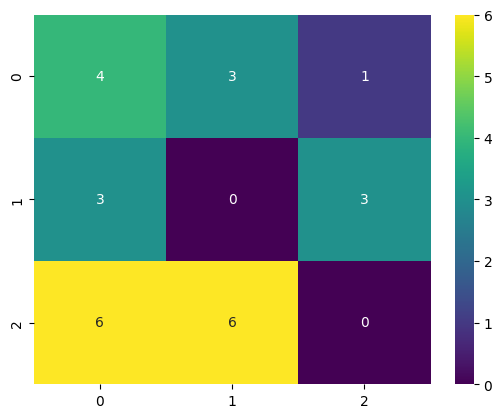

In [42]:

k=3
kmeans=KMeans(n_clusters=k,n_init='auto')
kmeans.fit(raw_exp.iloc[:,0:44770])
#column=f"kmeans_cluster_k{k}"
predicted=kmeans.labels_
confusion_mat=confusion_matrix(project_label, predicted)
sns.heatmap(confusion_mat,annot=True,cmap="viridis") 

In [43]:
transformed_data=pca.fit_transform(raw_exp.iloc[:,0:44770])


<Axes: >

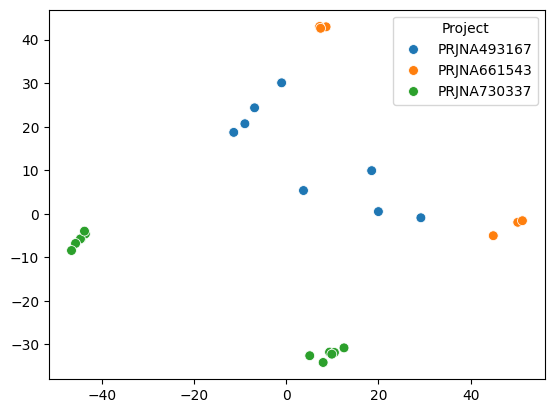

In [44]:
sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],s=50,hue=annot['Project'])


# References

## Websites

## ChatGPT

1- 
I want to apply Logistic regression on image data. (MNIST dataset from keras) . Do I have to flatten the features before hand? and convert 28*28 matrices to vectors?
Yes, you’re correct. When applying Logistic Regression to image data, such as the MNIST dataset, you need to flatten the 2D image matrices into 1D vectors12.

The reason for this is that Logistic Regression, like many other machine learning algorithms, expects input data in a tabular form where each row represents an instance and each column represents a feature12. In the case of image data, each pixel can be considered as a feature. So, a 28x28 pixel image from the MNIST dataset would be flattened into a 1D vector of 784 features (since 28*28=784).

Here’s a simple example of how you might do this in Python:

Python

from keras.datasets import mnist
import numpy## as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.lo##ad_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((100##00, 28 * 28))

# Convert to float and normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
AI-generated code. Review and use carefully. More info on FAQ.
In this code, we first load the MNIST dataset using Keras. Then, we reshape the images from 28x28 matrices into 1D vectors of length 784 using the reshape function. Finally, we normalize the pixel values to be between 0 and 1 by converting the data type to float32 and dividing by 255 (since pixel values range from 0 to 255).

Once you have your flattened features, you can then apply Logistic Regression or any other machine learning algorithm that expects input data in this format12.
]

# Questions:
Don't know how to interpret the results